This is a test of 2D interpolation with Dark Energy Survey (DES) data 

In [1]:
import numpy as np
import pandas
import pylab as plt
import cosmogp
%matplotlib inline  


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Load DES data :

In [2]:
des = pandas.read_hdf('decam_zernikes.h5','zernikes')
des_rec = des.to_records()
Filtre = (des_rec['expid']==284601)
X = des_rec['x'][Filtre]
Y = des_rec['y'][Filtre]
Z4 = des_rec['z04'][Filtre]


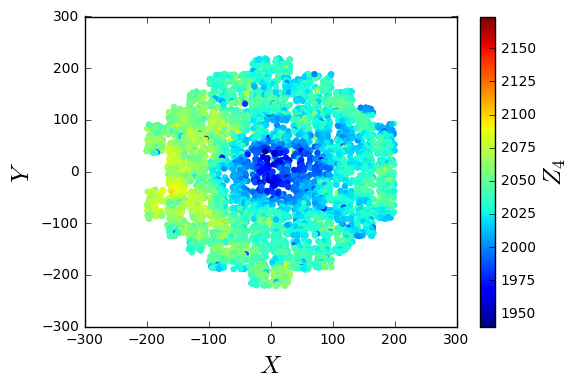

In [3]:
cmap=plt.cm.jet
norm=(Z4-Z4.min())/(Z4-Z4.min()).max()
col=cmap(norm)

scat=plt.scatter(X,Y,c=Z4,edgecolor='none',cmap=(cmap),visible=True,vmin=1940,vmax=2174)                      
cb=plt.colorbar(scat,format='%.0f')
cb.set_label('$Z_4$',fontsize=18)
plt.xlabel('$X$',fontsize=18)
plt.ylabel('$Y$',fontsize=18)


In [4]:
Filtre = np.sqrt((X -0) **2 + (Y-0) **2)<400

In [5]:
A=np.random.uniform(0,len(Z4)-1,size=400)
A=np.unique(A.astype(int))

In [6]:
len(A)

392

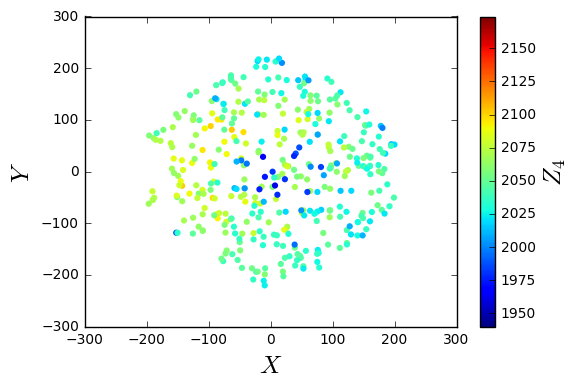

In [7]:
cmap=plt.cm.jet
norm=(Z4-Z4.min())/(Z4-Z4.min()).max()
col=cmap(norm)

scat=plt.scatter(X[A],Y[A],c=Z4[A],edgecolor='none',cmap=(cmap),visible=True,vmin=1940,vmax=2174)                      
cb=plt.colorbar(scat,format='%.0f')
cb.set_label('$Z_4$',fontsize=18)
plt.xlabel('$X$',fontsize=18)
plt.ylabel('$Y$',fontsize=18)

In [8]:
XX=np.array([X[A],Y[A]]).T
gp = cosmogp.gaussian_process(Z4[A]-np.mean(Z4[A]),XX,kernel='RBF2D') # init cosmogp with one object 

#gp.find_hyperparameters()
gp.hyperparameters[0]=np.std(Z4)
gp.hyperparameters[1]=5#10.
gp.hyperparameters[2]=5#10.
gp.hyperparameters[3]=0.

Z4_GP=np.zeros(len(Z4))

sub = 100
for i in range(len(Z4)/sub):
    XX_bis=np.array([X[i*sub:(i*sub)+sub],Y[i*sub:(i*sub)+sub]]).T
    gp.get_prediction(new_binning=XX_bis)
    Z4_GP[i*sub:(i*sub)+sub]=gp.Prediction[0] + np.mean(Z4[A])

modulo=len(Z4)%sub
XX_bis=np.array([X[i*sub:(i*sub)+modulo],Y[i*sub:(i*sub)+modulo]]).T
gp.get_prediction(new_binning=XX_bis)
Z4_GP[i*sub:(i*sub)+modulo]=gp.Prediction[0] 


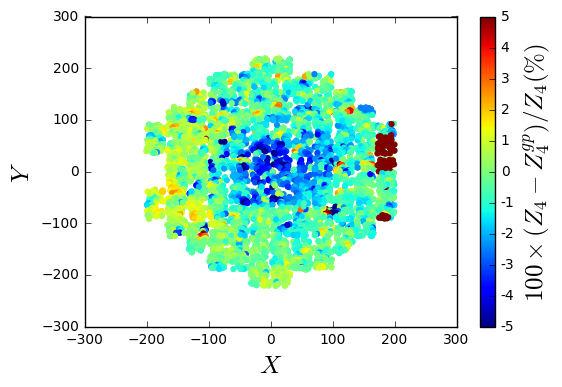

In [9]:
residuals = (Z4-Z4_GP)/Z4*100.

#plt.subplot(1,2,2)
cmap=plt.cm.jet
norm=(residuals-residuals.min())/(residuals-residuals.min()).max()
col=cmap(norm)

scat=plt.scatter(X[Filtre],Y[Filtre],c=residuals,edgecolor='none',cmap=(cmap),visible=True,vmin=-5,vmax=+5)                      
cb=plt.colorbar(scat,format='%.0f')
cb.set_label('$100 \\times (Z_4-Z_4^{gp})/Z_4 (\%)$',fontsize=18)
plt.xlabel('$X$',fontsize=18)
plt.ylabel('$Y$',fontsize=18)




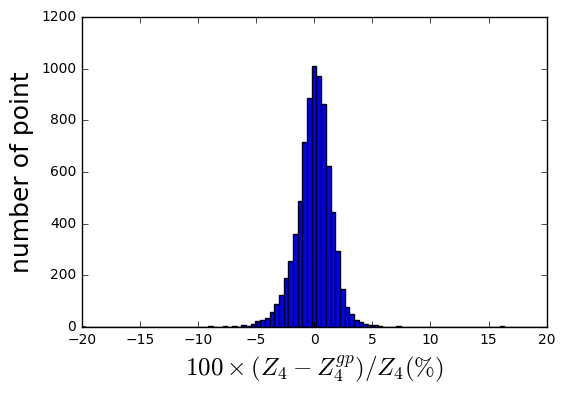

In [10]:
A = plt.hist(residuals,bins=np.linspace(-20,20,100))
plt.xlabel('$100 \\times (Z_4-Z_4^{gp})/Z_4 (\%)$',fontsize=18)
plt.ylabel('number of point',fontsize=18)